First 5 rows:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.14

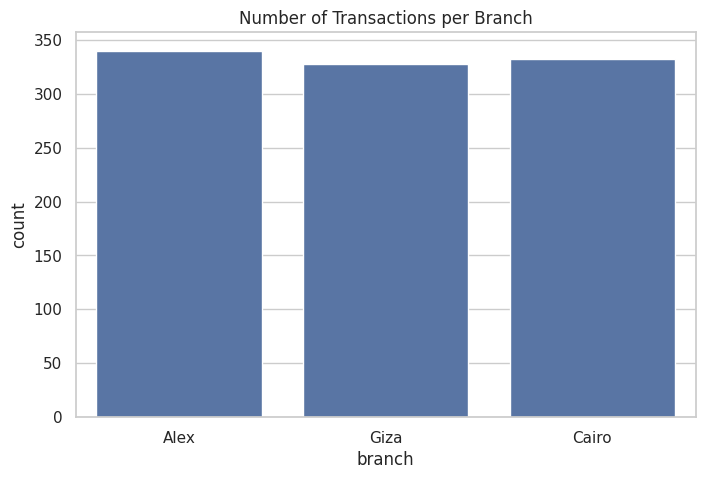

Cleaned dataset saved as 'cleaned_dataset.csv'


In [4]:
# ============================================
# Universal Data Analysis Script (Trainee Analyst)
# Works even if column names differ slightly
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------
# 1. Load the dataset
# ----------------------
df = pd.read_csv("SuperMarket Analysis.csv")

print("First 5 rows:")
print(df.head(), "\n")

# ----------------------
# 2. Basic Info
# ----------------------
print("Dataset Info:")
print(df.info(), "\n")

print("Summary Statistics:")
print(df.describe(include="all"), "\n")

print("Missing Values:")
print(df.isnull().sum(), "\n")

# ----------------------
# 3. Data Cleaning
# ----------------------
# Standardize column names (lowercase, underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert 'date' column if exists
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop duplicates
df = df.drop_duplicates()

# ----------------------
# 4. Detect important columns
# ----------------------
def find_column(keyword):
    """Find first column containing the keyword (case-insensitive)."""
    for col in df.columns:
        if keyword.lower() in col.lower():
            return col
    return None

col_total = find_column("total")
col_product_line = find_column("product")
col_branch = find_column("branch")
col_rating = find_column("rating")

print(f"Detected columns → Total: {col_total}, Product Line: {col_product_line}, Branch: {col_branch}, Rating: {col_rating}\n")

# ----------------------
# 5. Simple Analysis
# ----------------------
if col_branch and col_total:
    sales_by_branch = df.groupby(col_branch)[col_total].sum().sort_values(ascending=False)
    print("Total Sales by Branch:")
    print(sales_by_branch, "\n")

if col_product_line and col_rating:
    avg_rating = df.groupby(col_product_line)[col_rating].mean().sort_values(ascending=False)
    print("Average Rating by Product Line:")
    print(avg_rating, "\n")

# ----------------------
# 6. Visualization
# ----------------------
sns.set(style="whitegrid")

if col_branch:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col_branch)
    plt.title("Number of Transactions per Branch")
    plt.show()

if col_product_line and col_total:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=col_product_line, y=col_total, estimator=sum)
    plt.xticks(rotation=45)
    plt.title("Total Sales by Product Line")
    plt.show()

if col_total:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col_total], bins=20, kde=True)
    plt.title("Distribution of Transaction Totals")
    plt.show()

# ----------------------
# 7. Save cleaned data
# ----------------------
df.to_csv("cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")
